## Customer Churn Rate Analysis and Prediction for OC&Gym Gym Clubs Using Data from 2009 to 2019


#### Group four members:
- Yitong Liu | 01625757
- Faiz Fablillah | 01525542
- Mingming Zhu | 01548939
- Mukund Premkumar | 01605996
- Isabella Li | 01547310

### Summary


The objective of this project is to analyze customer churn for OC&Gym gym club’s membership across its entire operation. The analysis will be used to help reduce the customer churn and subsequently sustain desired revenue. The procedure we took was initially coming up with some hypothesis about the data and then testing those using data analysis. In the end we were able to arrive with several key insights based on which we produced actionable insights about the business. In addition, we also performed prediction of the number of customers churnning in one month and three months time based on modelling. 

### Introduction

This report analyses churn rates and revenue of a large London based gym franchise known as OC&Gym. The gym has been expanding significantly over the last 10 years but recently slowed expansion and to boost revenue the gym has increased prices. We have analysed visitation and customer data from 2009 to 2019 to find insights in order to minimise customer churn. The analysis process began with making 3 hypotheses about customer behaviour and churn.

1) The first hypothesis was that the following attributes would be related to the customer churn rate.

- Gender
- Age of customer
- Subscription Type of customer
- How regularly a customer attended the gym
- At what times (peak vs non peak) a customer attends the gym


2) Our second hypothesis was that there would be a strong seasonal effect to the revenue  and we would see significant changes around the time the pricing strategy was implemented.

3) Our third hypothesis was that there will be a correlation between the characteristics (size, population, average  income, affluence) of a London borough and the revenue earned from the gym in that borough.

We then performed data cleaning and took various cuts of the data, based on which we prepared graphs and performed statistical analysis to find actionable insights. In addition to this we attempted to prepare a machine learning model which would try and predict the duration a customer would join the gym for.  This would enable the gym to find customers who are likely to leave and target them with deals/discounts to prevent them leaving. In the end we were able to suggest a range of improvements to the gyms operations and pricing strategy.

### Technologies and techniques

#### I. Time-series analysis

**Please note that the time-series scripts took too long to run (over an hour) and only worked if you ran them block by block.  We are submiting a seperate ipynb and html file called time_series and have pasted the graphs as images into this notebook**

The area of exploration performed under time-series analysis was finding the churn of customers for each month, initially for the entire data set but later after splitting the data based on different characteristics to see if different customer groups responded to the price change differently in terms of both revenue and churn rate. 

Churn rate was defined as (number of customers who left during the month)/(number of customers at the start of the month). If a customer was to join and leave in the same month then we also increase the numerator and denominator by 1 ie. they count as a churned customer.

A key challenge that we faced was that the business was constantly expanding the number of clubs.  It would not be fair to compare the revenue of the gym when it only had one club open as opposed to when it had 5 clubs. Therefore we standardised the revenue by dividing the total monthly revenue by the total number of stores that were open in that month. Here on we will refer to that as standardised revenue.

In order to perform this analysis we first calculated the number of clubs open in each month.

Then we built a function which takes in the subscriptions data as a list of lists and a list containing each month of each year we want to analyse, in the format Month-Year eg. “Jan-11”.

We also built another function that returns the revenue for each month by taking in as input.
- A dataframe containing cleaned visit data
- A dataframe containing the number of stores in each month
- A list containing each month we want to analyse. 
- A list of lists containing the subscription information of customers we want to analyse.

Finally we just input all the data as well as cuts of the data such as all male or all female into the function and plotted the outputs to see relevant trends.


#### Ii. Statistical Techniques.
We started with defining the attributes that can be either found in dataset or new attributes that were derived from formula, for instance simple calculation that gave us percentage or average of some attributes created during the cleaning phase. The basis of the formula and calculation was referring to our hypothesis that we have defined in the earlier stage. We then perform data mining using statistical techniques of linear regression where we performed estimation of our defined variables’ value and also provide a description of the relationship between our independent and dependant variables. From regression models, we find patterns for all values of the variables by testing them out. 
We extended our analysis by performing a directed data mining technique of decision trees. This step recursively split data into smaller and smaller cells.We also used random forest model to perform our analysis to prevent the overfitting and high variance problem that a single decision tree may incur.



### Cleaning and preparing the data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import csv

In [52]:
# go back to grand parent level directory
path = os.path.abspath(os.getcwd() + "/../../")

### Import raw and processed data

-----------------------------
#### Import client and competitor pricing data

In [53]:
# import client data
client_price = pd.read_csv(os.path.join(path,'data/processed/client_price.csv'))
client_price

,Year,Flexible,Standard,Joinee,Dayass
0,2009,25.99,20.99,5,6
1,2010,25.99,20.99,5,6
2,2011,25.99,20.99,5,6
3,2012,25.99,20.99,5,6
4,2013,25.99,20.99,5,6
5,2014,25.99,20.99,5,6
6,2015,25.99,20.99,5,6
7,2016,30.99,26.99,5,6
8,2017,30.99,26.99,5,6
9,2018,30.99,26.99,5,6


In [54]:
# import competitor data
competitor_price = pd.read_csv(os.path.join(path,'data/processed/competitor_price.csv'))
competitor_price.head(2)

,Year,Flexible,Standard,Joinee
0,2009,35.99,30.99,8
1,2010,35.99,30.99,8


------------------------
### Create a customer visit database using visitationdataPART1.csv and visitationdataPART2.csv

In [55]:
# import visit data

def visit():
    visit_1 = pd.read_csv(os.path.join(path,'data/raw/visitationdataPART1.csv'))
    visit_2 = pd.read_csv(os.path.join(path,'data/raw/visitationdataPART2.csv'))
    visit_db = pd.concat([visit_1, visit_2])
    
    # combine columns to create date + time onject
    visit_db['timestamp'] = visit_db['visitdate']+' '+visit_db['TimeofVisit']
    visit_db['timestamp'] = pd.to_datetime(visit_db['timestamp'])
    visit_db['is_peak'] = [1 if x else 0 for x in visit_db['peakvisits']]

    visit_db = visit_db.drop(columns=['peakvisits', 'visitdate', 'TimeofVisit'])
    visit_db = visit_db.rename(columns={"CustomerID": "id"})
    
    print(f'{len(visit_db)} visits found and imported')
    return visit_db

In [59]:
visit_db = visit()
visit_db.head(2)

FileNotFoundError: [Errno 2] File b'C:\\Users\\Isabella\\Desktop\\Analytics in business\\coursework 1\\ba_aib_group4_oc-gym-master\\ba_aib_group4_oc-gym-master\\data/raw/visitationdataPART1.csv' does not exist: b'C:\\Users\\Isabella\\Desktop\\Analytics in business\\coursework 1\\ba_aib_group4_oc-gym-master\\ba_aib_group4_oc-gym-master\\data/raw/visitationdataPART1.csv'

In [ ]:
# round up to next day to find the cutoff time
from pandas.tseries.offsets import MonthEnd
as_of_date = visit_db['timestamp'].max().round('D')+ MonthEnd(1)
as_of_date


------------------------
###  Create a customer subscription database using subcriptiondataFINAL.csv

In [57]:
def membership():
    #### membership database ####
    # import subscription data and create a membership database
    membership_list = []
        
    with open(os.path.join(path,'data/raw/subscriptionsdataFINAL.csv')) as subscription_file:    
        read_csv = csv.reader(subscription_file, delimiter=',')  
        next(read_csv, None)    # skip the headers
                
        # a pct score based on % of total population ranked below a certain class.
        # information source: National Readership Survey
        # http://www.nrs.co.uk/nrs-print/lifestyle-and-classification-data/social-grade/
        affluence_rank = {'A' : 0.96,     # upper middle
                           'B' : 0.73,    # middle
                           'C1': 0.45,    # lower middle
                           'C2': 0.25,    # skilled working
                           'DE': 0}       # lower working and non-working
        
        for r in read_csv:
            club = r[0]
            join_mth = dt.datetime.strptime(r[1], '%b-%y')
            s_cls = affluence_rank[r[2]]
            is_male = (1 if r[3] == 'Male' else 0)
            is_std = (1 if r[4] == 'Standard' else 0)                     
            id = int(r[6])

            # calculate age at joining the gym. add extra year if joining in July or later.
            join_age = join_mth.year - int(r[7]) + (1 if join_mth.month >= 7 else 0)
            
            # fix end_dates
            if r[5] != '#N/A':
                end_mth = dt.datetime.strptime(r[5], '%b-%y')
                is_active = 0
                end_date = end_mth + dt.timedelta(days=31)    # calculate <1 month as 1 month 
                
                ######## check whether left due to price hike #####
                is_left_Dec15 = 1 if end_mth == dt.datetime(2015, 12 ,1) else 0

            else:
                end_mth = np.nan
                is_active = 1
                end_date = as_of_date + dt.timedelta(days=1)    # calculate last date as of 1-Feb
                is_left_Dec15 = 0
                
            ######## MORE summary data ########
            # membership duration in months
            m_dur = (end_date.year - join_mth.year) * 12 + end_date.month - join_mth.month
            
            # member revenue to 2015
            if join_mth < dt.datetime(2015,12,31):
                cutoff = min(end_date, dt.datetime(2016,1,1))
                m_to_15 = (cutoff.year - join_mth.year) * 12 + cutoff.month - join_mth.month
            else:
                m_to_15 = 0
                
            rev_to_15 = m_to_15 * (20.99 if is_std == 1 else 25.99)
            
            # member revenue fr 2016
            m_fr_16 = m_dur if join_mth > dt.datetime(2015,12,31) else 0  
            rev_fr_16 = m_fr_16 * (26.99 if is_std == 1 else 30.99)
            
            # concat all member information
            member_info = [id, is_male, join_age, s_cls, club, join_mth, end_mth, is_std, 
                            m_dur, is_left_Dec15, is_active, end_date, rev_to_15, rev_fr_16, rev_to_15 + rev_fr_16,]
            membership_list.append(member_info)
    
    column_name = ['id', 'is_male', 'join_age', 's_class_rank', 'club', 'join_mth', 'end_mth','is_std',
                   'mth_active', 'is_left_Dec15', 'is_active', 'last_active_date', 'rev_to_15', 'rev_fr_16', 'rev_to_date']
    
    membership_db = pd.DataFrame(membership_list, columns=column_name)
    
    print(f'{len(membership_db)} members found and imported')
    return membership_db

In [58]:
membership_db = membership()
membership_db.head(2)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Isabella\\Desktop\\Analytics in business\\coursework 1\\ba_aib_group4_oc-gym-master\\ba_aib_group4_oc-gym-master\\data/raw/subscriptionsdataFINAL.csv'


------------------------
### Summerise visit data and add useful attributes to membership database

#### Create some summary stats by customer_id
- first visit
- last visit
- total visit
- total peak hour visit

In [62]:
first_visit = visit_db.groupby('id').nth(0)['timestamp'].rename('first_visit').to_frame().reset_index()
last_visit = visit_db.groupby('id').nth(-1)['timestamp'].rename('last_visit').to_frame().reset_index()
total_visit = visit_db.groupby('id')['timestamp'].count().rename('total_visit').to_frame().reset_index()
total_peak_hour_visit = visit_db.groupby('id')['is_peak'].sum().rename('total_peak').to_frame().reset_index()

NameError: name 'visit_db' is not defined

In [ ]:
# merge data onto membership_db
membership_db = membership_db.merge(first_visit, how='left', left_on=['id'], right_on = ['id'])
membership_db = membership_db.merge(last_visit, how='left', left_on=['id'], right_on = ['id'])
membership_db = membership_db.merge(total_visit, how='left', left_on=['id'], right_on = ['id'])
membership_db = membership_db.merge(total_peak_hour_visit, how='left', left_on=['id'], right_on = ['id'])

In [ ]:
# fill in nans
membership_db['total_visit'] = membership_db['total_visit'].fillna(0).astype(int)
membership_db['total_peak'] = membership_db['total_peak'].fillna(0).astype(int)

days = membership_db['last_active_date'] - membership_db['join_mth']
membership_db['pct_gym_usage'] = membership_db['total_visit'].divide(days.dt.days)
membership_db['pct_peak'] = membership_db['total_peak'].divide(membership_db['total_visit'])

membership_db.loc[~np.isfinite(membership_db['pct_gym_usage']), 'pct_gym_usage'] = 0
membership_db.loc[~np.isfinite(membership_db['pct_peak']), 'pct_peak'] = 0

In [ ]:
membership_db = membership_db.drop(columns=['last_active_date'])
membership_db.head(2)

### Create some summary stats by gym
- gym total revenue up to dec 2015
- gym total revenue from Jan 2016
- Number of people left in Dec 2015 before price rise
- gym's revenue contribution

In [60]:
club_rev = membership_db.groupby('club').sum()[['rev_to_15', 'rev_fr_16', 'rev_to_date']].sort_values(by=['rev_to_date'], ascending=False)
club_rev['rev_%'] = club_rev['rev_to_date']/club_rev['rev_to_date'].sum()

member_loss_dec15 = membership_db.groupby('club')['is_left_Dec15'].sum().rename('member_left_Dec15').to_frame().reset_index()
member_loss_all = membership_db.groupby('club')['is_left_Dec15'].sum().rename('member_left').to_frame().reset_index()
member_loss_all = membership_db.groupby('club')['is_left_Dec15'].sum().rename('member_left_Dec15').to_frame().reset_index()
club_rev = club_rev.merge(member_loss_dec15, how='left', left_on=['club'], right_on = ['club'])

#club_rev['loss_%'] = club_rev['rev_to_date']/club_rev['rev_to_date'].sum()
club_rev.head()


,club,rev_to_15,rev_fr_16,rev_to_date,rev_%,member_left_Dec15
0,Hounslow,3.745534e+06,1976655.44,5.722190e+06,0.056200,873
1,Greenwich,3.558127e+06,1881685.01,5.439812e+06,0.053427,794
2,Havering,2.959284e+06,2359068.66,5.318353e+06,0.052234,980
3,Richmond upon Thames,3.358700e+06,1658391.26,5.017091e+06,0.049275,756
4,Harrow,2.908353e+06,1949868.69,4.858221e+06,0.047715,845


### Club environment 

In [61]:
mthly_visits = visit_db.groupby([visit_db.timestamp, visit_db.id]).count()
mthly_visits.head()

NameError: name 'visit_db' is not defined

In [ ]:
mthly_visits_1 = mthly_visits.reset_index()
mthly_visits_1['year_mth'] = [dt.datetime(t.year, t.month, 1) for t in mthly_visits_1['timestamp']]


In [ ]:
mthly_visits_1.head()

In [ ]:
mthly_visits_2 = mthly_visits_1[['id','is_peak','year_mth']].merge(membership_db[['id','clu

In [ ]:
mthly_visits_2.head()

#### calculate avg monthly active member

In [ ]:
gym_cap = mthly_visits_2.groupby(['club','year_mth'])['id'].nunique().rename('active_member').to_frame().reset_index()
gym_cap = gym_cap.groupby(['club'])['active_member'].mean().rename('avg_mthly_active_member').to_frame().reset_index()
gym_cap.head()

#### calculate average monthly visits

In [ ]:
gym_visit = mthly_visits_2.groupby(['club','year_mth'])['is_peak'].count().rename('visits').to_frame().reset_index()
gym_visit = gym_visit.groupby(['club'])['visits'].mean().rename('gym_mthly_visit').to_frame().reset_index()
gym_visit.head()

In [ ]:
club_rev = club_rev.merge(gym_cap, how='left', left_on=['club'], right_on = ['club'])
club_rev = club_rev.merge(gym_visit, how='left', left_on=['club'], right_on = ['club'])
club_rev.head()

#### Attached to membership

In [ ]:
membership_db = membership_db.merge(club_rev[['club','rev_%','gym_mthly_visit']], how='left', left_on=['club'], right_on = ['club'])
membership_db['is_age_below_40'] = [1 if t <= 40 else 0 for t in membership_db['join_age']]
membership_db['is_age_above_40'] = [1 if t > 40 else 0 for t in membership_db['join_age']]
membership_db.head(2)

### Export to CSV

In [ ]:
membership_db.to_csv(os.path.join(path,'data/processed/membership_clean.csv'), index=False)   
membership_db.head(2)

### Results

### Results hypothesis 1

Our first hypothesis assumed that several attributes would be related to churn. The below section explores what we found for each attribute.

### Gender

#### Analysis

[to insert graph/table]

#### Findings

The above graph compares the revenue and churn rates between males and females. We can see that both genders follow a very similar pattern but females have consistently had a higher churn rate and have contributed less towards revenue. The gym should take steps to help motivate women and keep them attending.

#### Suggestions/Limitations

The gym could offer a free diet/training plan advice as a group session for all women once a month where they get advice specific to female body types. This could help them make more progress and hence gain motivation and not drop their gym subscription.

### Subscription Type of customer

#### Analysis

[to insert graph/table]

#### Findings

From the above graph we can see that contribution to revenue has been greater from the standard gym package as opposed to the flexible package. Standardised revenue from the standard package took a more significant drop after the price hike but has since consistent grown and is now higher than before the price change. Additionally, the churn rate from the standard customers is significantly lower.


#### Suggestions/Limitations

Overall the business needs to try and sell more standard packages, a strategy for this could be to alter the pricing strategy to waive the 6 pound joining fee for standard customers when they join.

### At what times (peak vs non peak) a customer attends the gym

#### Analysis

[to insert graph/table]

#### Findings
The above graph shows the average duration of gym membership for customers who visit primarily during peak hours as opposed to during non peak hours. The graph shows that there is only a miniscule difference between their average duration and hence is not a significant factor in determining churn.

### Age at time of joining

#### Analysis

[to insert graph/table]

#### Findings
The above scatterplot shows the distribution of the number of months people of different joining ages are active at the gym. We can see a clear trend that people who join at around age 38 are more likely to stay longer. This average duration of gym membership reduces significantly as the age of the customer increases beyond 45 years.

#### Suggestions/Limitations
Overall the business needs to try and sell more standard packages, a strategy for this could be to alter the pricing strategy to waive the 6 pound joining fee for standard customers when they join.

### How regularly a customers attended the gym

#### Analysis
[to insert graph/table]

#### Findings
The graph shows the relationship between the total number of visits to a gym within a month and the average duration of gym memberships within the gym. We can see  mild correlation, where the average durations are decreasing as the number of visits decrease. So to maintain a lower churn rate, gyms need to ensure that their members visit more often

### Results hypothesis 2 

Our second hypothesis was that there would be a strong seasonal effect to the revenue and churn rate. Additionally revenue and churn rate would be negatively impacted by the price increase in 2016.

## Seasonal effect on revenue and impact of the price increase

#### Analysis
[to insert graph/table]

#### Findings


The above graph shows the change in revenue and churn rate over time for all customers. There is a huge upword spike in churn rate right before Jan 2016, which is because many customers wanted to leave before the new pricing. In addition to this, we can see a significant drop in standardised revenue right after the spike. However, the revenue does increase again to the amount it was before the price change. The churn rate also restores to a similar level. So overall the price change has not had a long term negative impact on the business.  Therefore our hypothesis was only partially correct.  Although the price hike impacted both churn and revenue, neither of them were impacted long term.

Now looking at the seasonal impacts of the data, we can see that from about 2014 onwards, there is a significant decrease in revenue each year during February. This is likely because people often take on new year resolutions or get given gym memberships as Christmas gifts but often give up soon.



#### Suggestions/Limitations
We suggest offering free diet/training information sessions during January in order to educate people so they see results from their training and choose to continue exercising.

### Results additional findings
While exploring the data we discovered additional findings which were not a part of the original hypothesis.

#### Analysis
[to insert graph/table]

#### Findings
The below graph shows the distribution of how long members continued their gym subscription. We can see that the majority of participants, quit within the first 5 months and very few stayed beyond 10.

### Suggestions/Limitations
The gym could update their pricing strategy to include a yearly contract at a cheaper rate. This will force customers to stay with the gym for an entire year.

### Prediction on individual churn (bonus question)

### Analysis

### 1. Choose the independent variables and the dependent variables for modelling  

In [2]:
# import cleaned membership data
membership_db = pd.read_csv(os.path.join(path,'data/processed/membership_clean.csv'))
membership_db.head()

,id,is_male,join_age,s_class_rank,club,join_mth,end_mth,is_std,mth_active,is_left_Dec15,...,rev_to_date,first_visit,last_visit,total_visit,total_peak,pct_gym_usage,pct_peak,rev_%,gym_mthly_visit,is_age_below_40
0,1,1,20,0.45,Enfield,2011-12-01,2011-12-01,1,1,0,...,20.99,2011-12-01 08:00:00,2011-12-27 18:45:00,20,9,0.645161,0.450000,0.040164,27020.523364,1
1,2,0,46,0.96,Greenwich,2018-06-01,NaN,1,8,0,...,215.92,2018-06-01 17:30:00,2019-01-08 18:30:00,74,41,0.302041,0.554054,0.053427,33372.886957,0
2,3,0,33,0.73,Islington,2018-03-01,2018-10-01,1,8,0,...,215.92,2018-03-03 19:00:00,2018-10-26 07:45:00,165,110,0.673469,0.666667,0.045245,34594.000000,1
3,4,0,44,0.45,Hounslow,2015-10-01,2015-12-01,1,3,1,...,62.97,2015-10-02 09:00:00,2015-12-28 19:30:00,52,32,0.565217,0.615385,0.056200,34880.376068,0
4,5,1,33,0.25,Barnet,2015-05-01,2015-12-01,1,8,1,...,167.92,2015-05-03 19:15:00,2015-12-27 17:15:00,93,63,0.379592,0.677419,0.044240,33058.270833,1


### The following table explains the definition of each attribute that may be used in the following analysis

In [15]:
# import description file
pd.read_csv(os.path.join(path,'data/processed/membership_clean_description.csv'))

,Unnamed: 0,row 1,row 2,dtype,definition
0,id,1,2,int,customer id
1,is_male,1,0,bin,"1 = male, 0 = female"
2,join_age,20,46,int,age at joining time
3,s_class_rank,0.45,0.96,float,% of population ranked below this member's soc...
4,club,Enfield,Greenwich,str,gym location
5,join_mth,1/12/2011,1/06/2018,datetime,join month-year (day uncertain)
6,end_mth,1/12/2011,NaT,datetime,end month-year (day uncertain)
7,is_std,1,1,int,"1 for standard, 0 for flexible"
8,mth_active,1,8,bin,"For active membership, duration = as_of_date -..."
9,is_left_Dec15,0,NaN,bin,"1 for member left in Dec 2015, before the pric..."


In [5]:
# training database
ceased_db = membership_db[membership_db['is_active'] == 0]
active_db = membership_db[membership_db['is_active'] == 1]
print(f'{len(ceased_db)} members have left the gym. {len(active_db)} members are active.')

797656 members have left the gym. 52377 members are active.


#### Normalise variables

In [36]:
ceased_db['club_profit_pct_unif'] = (ceased_db['rev_%'] - np.min(ceased_db['rev_%'])) / (np.max(ceased_db['rev_%']) - np.min(ceased_db['rev_%']))
ceased_db['club_visitor_unif'] = (ceased_db['gym_mthly_visit'] - np.min(ceased_db['gym_mthly_visit'])) / (np.max(ceased_db['gym_mthly_visit']) - np.min(ceased_db['gym_mthly_visit']))

C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### In general, three modeling methods, namely OLS, Decision Tree and Random Forest will be used in the prediction.

(1) Independent variables/ X-variables: 

- 'is_male': whether the customer is male(1) or female(0)
- 'join_age': the age of the customer at the joining date
- 's_class_rank':percentage of population that is ranked below the customer's affluence
- 'is_std': whether the subscription type is standard(1) or flexible(0)
- 'is_left_Dec15' : whether the customer left the gym in December 2015(yes:1, no:0)
- 'pct_gym_usage': the total number of days the customer visits the gym/ the total number of days the customer remaining as a member
- 'pct_peak': total peak times when the customer visits the gym/ total times the customer visits the gym
- 'club_profit_pct_unif':the normalised profitability contribution by club
- 'club_visitor_unif': the normalised amount of visits the customer's gym receives per month on average

(2) Dependent variables / Y-variables: 
- 'mths_active': For active membership, the months they remain as a member up till today; for ceased membership, the months they were a member in the gym.

In [37]:
# Assign the x and y variables
x = ceased_db[['is_male', 'join_age', 's_class_rank', 'is_std', 'is_left_Dec15', 'pct_gym_usage', 'pct_peak',
               'club_profit_pct_unif','club_visitor_unif']]
y = ceased_db['mth_active']

In [38]:
# Visualise the x variables in a table
x.head()

,is_male,join_age,s_class_rank,is_std,is_left_Dec15,pct_gym_usage,pct_peak,club_profit_pct_unif,club_visitor_unif
0,1,20,0.45,1,0,0.645161,0.450000,0.691850,0.163276
2,0,33,0.73,1,0,0.673469,0.666667,0.789494,0.609349
3,0,44,0.45,1,1,0.565217,0.615385,1.000000,0.626217
4,1,33,0.25,1,1,0.379592,0.677419,0.770175,0.518896
5,1,35,0.45,1,0,0.423913,0.256410,0.836952,0.715015


### 2. Modelling

#### 2.1 Run OLS regression model 

In [39]:
import statsmodels.api as sm

In [40]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mth_active   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                 2.850e+05
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:38:12   Log-Likelihood:            -1.9762e+06
No. Observations:              797656   AIC:                         3.952e+06
Df Residuals:                  797647   BIC:                         3.953e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
is_male                  0.2160      0.006     33.717      0.000       0.203       0.229
join_age                 0.0397      0.000    110.042      0.000       0.039       0.040
s_class_rank             0.5186      0.013     39.490      0.000       0.493       0.544
is_std                   1.9375      0.008    242.544      0.000       1.922       1.953
is_left_Dec15           -0.3211      0.021    -15.045      0.000      -0.363      -0.279
pct_gym_usage            3.5964      0.016    222.448      0.000       3.565       3.628
pct_peak                -1.1755      0.021    -55.724      0.000      -1.217      -1.134
club_profit_pct_unif     0.4123      0.014     30.259      0.000       0.386       0.439
club_visitor_unif        0.6964      0.016     44.351      0.000       0.666       0.727
==============================================================================
Omnibus:                   355879.007   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2409886.320
Skew:                           2.036   Prob(JB):                         0.00
Kurtosis:                      10.478   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the chart above, we can see that R-squared is 76.3%， meaning that only 76.3% of the variation in the number of months a customer remains as a member in the gym can be explained by the model. The attributes 'is_male', 'join_age', 's_class_rank', 'is_std', 'pct_gym_usage', 'club_profit_pct_unif' and 'club_visitor_unif' have positive effect on the duration of membership while attributes 'is_left_Dec15' and 'pct_peak' show negative effect on the same. We decide not to use this model as we do not think it can provide accurate prediction. 

### 2.2 Run the decision tree model

In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [41]:
# Splitting up the dataset into two datesets: Training 85%, Validation 15%
train_x, valid_x, train_y, valid_y = train_test_split(x, y, train_size=int(len(x)*0.85), test_size=int(len(x)*0.15))
print(f" Training: {len(train_x)} | Validation: {len(valid_x)}")

 Training: 678007 | Validation: 119648


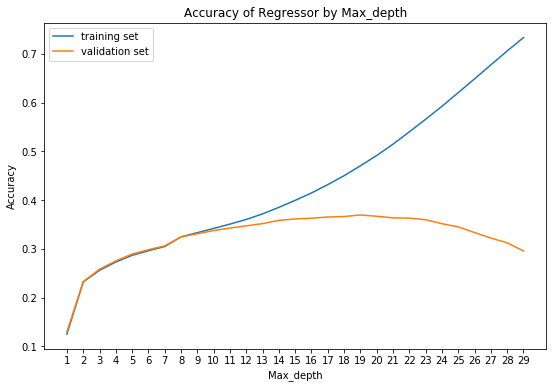

In [42]:
# find the optimal max depth for the decision tree
score = []

for i in range(1, 30):
    reg = DecisionTreeRegressor(max_depth = i)
    reg.fit(train_x, train_y)
    
    t_score = reg.score(train_x, train_y)
    v_score = reg.score(valid_x, valid_y)
    score.append([i, t_score, v_score])

score = np.asarray(score)

# Plot the graph for the accuracy of regressor by max depth

plt.figure(figsize=(9,6))
plt.plot(score[:,0],score[:,1:]) 

plt.legend(['training set', 'validation set']);
plt.title('Accuracy of Regressor by Max_depth')
plt.xticks(range(1,30,1))
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()

#### By observation from the graph above, the accuracy rates for the validation dataset do not reach 40% across the different max_depths and therefore, we decide not to adopt this model.

### 2.3 Run the Random Forest model

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#### 2.3.1 Training the Random Forest Model on the training and validation dataset   

Result from Grid Search suggests that max_depth should be 30 or more, however n_estiamtor can be reduced for the random forest model

In [43]:
#  Training the random forest model on the training dataset
rgr = RandomForestRegressor(n_estimators=15, max_depth=50, random_state=0)
rgr.fit(train_x, train_y)
 
# Showing the accuracy rates for the model on training dataset 
t_score = rgr.score(train_x, train_y)

print(f" The accuracy rate for training dataset: {t_score :.2%}.")

 The accuracy rate for training dataset: 92.04%.


In [44]:
alid_y_pred = rgr.predict(valid_x)
valid_score = rgr.score(valid_x, valid_y)
print(f" The accuracy of the random forest model on the validation set is {valid_score :.2%}.")

 The accuracy of the random forest model on the validation set is 52.85%.


#### 2.3.2 Re-train using all ceased member 

In [45]:
rgr.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

#### 2.3.3 Prediction on membership life of existing members based on the re-trained model

In [46]:
active_db['club_profit_pct_unif'] = (active_db['rev_%'] - np.min(active_db['rev_%'])) / (np.max(active_db['rev_%']) - np.min(active_db['rev_%']))
active_db['club_visitor_unif'] = (active_db['gym_mthly_visit'] - np.min(active_db['gym_mthly_visit'])) / (np.max(active_db['gym_mthly_visit']) - np.min(ceased_db['rev_%']))

test_x = active_db[['is_male', 'join_age', 's_class_rank', 'is_std', 'is_left_Dec15', 'pct_gym_usage', 'pct_peak',
               'club_profit_pct_unif','club_visitor_unif']]
test_y = active_db['mth_active']

test_y_pred = rgr.predict(test_x)

C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 2.3.4 Examine fitted features of the re-trained model

In [47]:
feature_importances = pd.DataFrame(rgr.feature_importances_, index = test_x.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
pct_gym_usage,0.468222
pct_peak,0.253516
is_std,0.082345
join_age,0.067832
club_visitor_unif,0.043097
club_profit_pct_unif,0.041143
s_class_rank,0.027847
is_male,0.010551
is_left_Dec15,0.005448


#### we can see from the above that almost 50% of the importance comes from pct_gym_usage, ranking the first, followed by pct_peak, contributing approximately 25% of the importance, and next comes the is_std with approximately 8% of importance.

#### 2.3.5 Create an expected remaining membership life column for each active member based on the random forest model above and we denote it "mth_till_churn" for simplicity purpose.

In [48]:
active_db['pred_mth_active'] = test_y_pred
active_db['mth_til_churn'] = active_db['pred_mth_active'] - active_db['mth_active']
active_db['mth_til_churn'][active_db['mth_til_churn']  <= 0] = 0

predictions = active_db[['id', 'is_male','club', 'join_age', 's_class_rank', 'is_std','pct_gym_usage','pct_peak',
               'mth_active','pred_mth_active', 'mth_til_churn']]

predictions.head()

C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Isabella\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

,id,is_male,club,join_age,s_class_rank,is_std,pct_gym_usage,pct_peak,mth_active,pred_mth_active,mth_til_churn
1,2,0,Greenwich,46,0.96,1,0.302041,0.554054,8,10.000000,2.000000
13,14,0,Ealing,37,0.96,1,0.467391,0.593023,6,7.800000,1.800000
37,38,1,Hammersmith,35,0.73,0,0.200000,0.302326,7,6.000000,0.000000
48,49,1,Kingston upon Thames,28,0.73,1,0.569106,0.642857,4,4.066667,0.066667
94,95,1,Merton,18,0.73,1,0.728261,0.427861,9,9.400000,0.400000


### 2.3.6 Prediction on the number of people that will churn within the next one month by club

In [49]:
# the prediction on the total number of people that will churn within the next one month
leaving_1m = predictions[predictions['mth_til_churn']<=1]
print(f'{len(leaving_1m)} people are predicted to churn within one month.')

# the prediction on the number of people that will churn within the next one month by clubs
leaving_1m.groupby(['club'])['id'].count().sort_values(ascending = False)

34706 people are predicted to churn within one month.


club
Havering                  1390
Hammersmith               1383
Kensington and Chelsea    1379
Barking                   1306
Lewisham                  1280
Wandsworth                1254
Southwark                 1251
Bromley                   1237
Croydon                   1203
Newham                    1197
Kingston upon Thames      1192
Hackney                   1184
Tower Hamlets             1148
Waltham Forest            1141
Islington                 1140
Harrow                    1118
Merton                    1075
Brent                     1072
Barnet                    1029
Hillingdon                1029
Westminster                985
Greenwich                  978
Camden                     961
Hounslow                   948
Redbridge                  913
Lambeth                    908
Bexley                     901
Richmond upon Thames       888
Ealing                     887
Sutton                     795
Haringey                   791
Enfield                    743
Nam

### 2.3.7 Prediction on the number of people that will churn within the next three months by club

In [50]:
# Prediction on the total number of people that will churn within the next three months
leaving_3m = predictions[(predictions['mth_til_churn']<=3)]
print(f'{len(leaving_3m)} people are predicted to churn within 3 month.')

# Prediction on the number of people that will churn within the next three months by clubs
leaving_3m.groupby(['club'])['id'].count().sort_values(ascending = False)

46989 people are predicted to churn within 3 month.


club
Kensington and Chelsea    1961
Hammersmith               1873
Havering                  1857
Barking                   1758
Bromley                   1727
Lewisham                  1695
Kingston upon Thames      1631
Southwark                 1613
Hackney                   1594
Newham                    1589
Wandsworth                1588
Croydon                   1569
Waltham Forest            1519
Tower Hamlets             1511
Harrow                    1501
Hillingdon                1483
Islington                 1482
Merton                    1482
Brent                     1478
Greenwich                 1386
Barnet                    1371
Redbridge                 1314
Camden                    1304
Bexley                    1282
Lambeth                   1272
Ealing                    1253
Westminster               1247
Hounslow                  1239
Richmond upon Thames      1194
Haringey                  1107
Sutton                    1097
Enfield                   1012
Nam

#### Findings


We find that the fitness of the three models are: (i)the OLS regression model, R-Squared is 76%; (ii) the decision tree, the accuracy rate for the validation dataset is lower than 40% and (iii) the random forest model, the accuracy rate for the validation dataset is approximately 53%.

The random forest model is chosen for the prediction purpose for the following reasons: (i) it has a higher accuracy rate than the single decision tree; (ii) it prevents the overfitting problem and has less variance compared with the single decision tree; (iii) it can provide insight of the importance of the features; (iv) R-Squared for the OLS regression model is relatively low.

The outcomes of our predictions based on the random forest model are:

(i) approximately 34706 customers are predicted to churn within the next one month;
(ii) approximately 46989 customers are predicted to churn within the next three months;
(iii) within the next one month or three months, Kensington and Chelsea is expected to have the most customers churn , with Hammersmith being the second while Enfield is reported to have the lowest number of customers churn;
(iv) attributes 'pct_gym_usage' and 'pct_peak' have the biggest explanatory power in the prediction

#### Suggestions/ Limitations:

Potentially we can predict the customer churn rate based on 'pct_gym_usage' and 'pct_peak', being the frequency of customers using the gym and whether they go at peak times or not.

However, there exist certain limitations in the random forest model: (i）it is more complex than the OLS regression model and the single decision tree model and therefore is more time and computational resources consuming; (ii) the result is less intuitive; (iii) the optimal max_depth we derive from grid search for the random forest model is large compared to the number of attributes, which may indicate overfitting problem and (iv) the accuracy rate of the random forest model is not high.


### Discussion

Looking back at our first hypothesis we suggested that 5 different attributes would be related to churn rate. After exploring these we found that churn was related to 4 of these and based on these 4 we were able to suggest actionable insights to business. Looking back at the second hypothesis, we were able to find some seasonal effects with revenue dropping each year in February and were able to see a significant drop in revenue and increase in churn when the pricing strategy was implemented. However the revenue and churn rates soon returned to its prior levels. 

Based on research from these 2 hypothesis we were able to make several suggestions to the business. 
1. We suggest making two changes to the gym’s pricing strategy.  Firstly, to encourage members to stay longer, offer a 1 year subscription at a slightly lower cost. Secondly, to remove the joining fee of 6 pounds, to encourage gym members to take on the standard membership which generally has a lower churn rate.
2. There are several groups of customers within your business that are more likely to churn than others. (to be finished off)
3. Finally when expanding the business further, find suburbs whith a high number of people with affluence level ‘A’ as this correlates with higher revenue. 

The above suggestions aim to both maximise the revenue of the business and minimise the churn rate. However it is not reasonable to expect the business to see the same growth that they did when they first started out and rapidly expanded

A key limitation of our  analysis is that we did not look at the combined effect of factors. For example we explored gender and age brackets separately, but not females within a certain age bracket. A lot of our analysis focused on revenue, but we were not provided information about costs/profitability. Data regarding costs may significantly change our findings and business suggestions. A deeper insight and better suggestions could be provided with the following data.
- Data relating to the gym industry beyond London to see if we can target those areas
- Data relating to surveys of customer experience at the gym
- Data regarding quality of coaches/trainers at the gym
- Data regarding size/capacity of gym and availability of gym equipment
- Competitor data to compare the performance of the two businesses

Finally, we used the random forest model to get the prediction that approximately 34706 and 46989 customers are predicted to churn within the next one month and three months respectively with club Kensington and Chelsea predicted to have the most customers churn rate. However, the prediction may be subject to the limitation that the random forest model may not the optimal model for prediction in this case.

### References

[to insert any source used]